<a href="https://colab.research.google.com/github/Aurorcys/RSI-BOT/blob/main/RSI_BOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

What stock you want bozo: LRN


/tmp/ipython-input-3254327758.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download(ticker, period=period)
[*********************100%***********************]  1 of 1 completed


RESULTS
Initial Value: 10000
Final Value: [13210.1774761]
Total Return: [32.10177476]%
Buy and Hold RESULT:  $[7287.1370798]


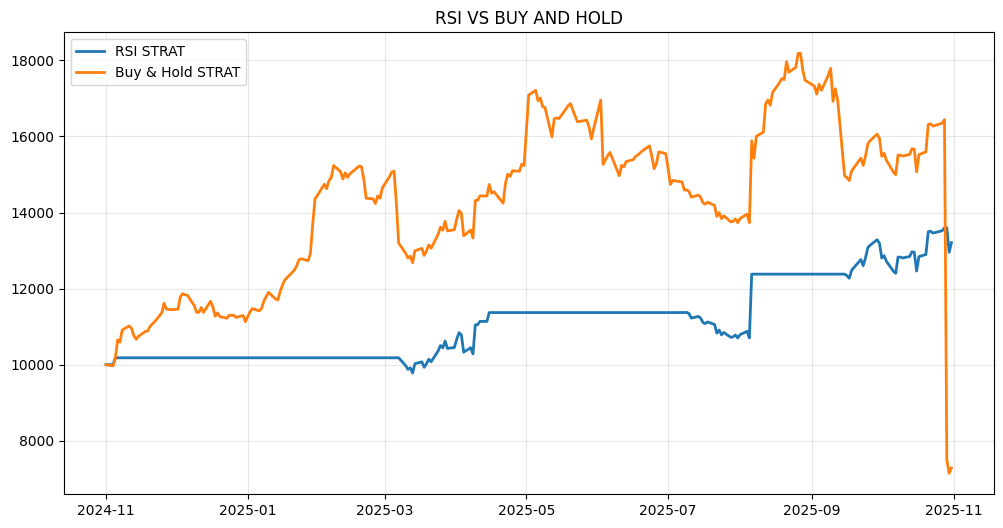

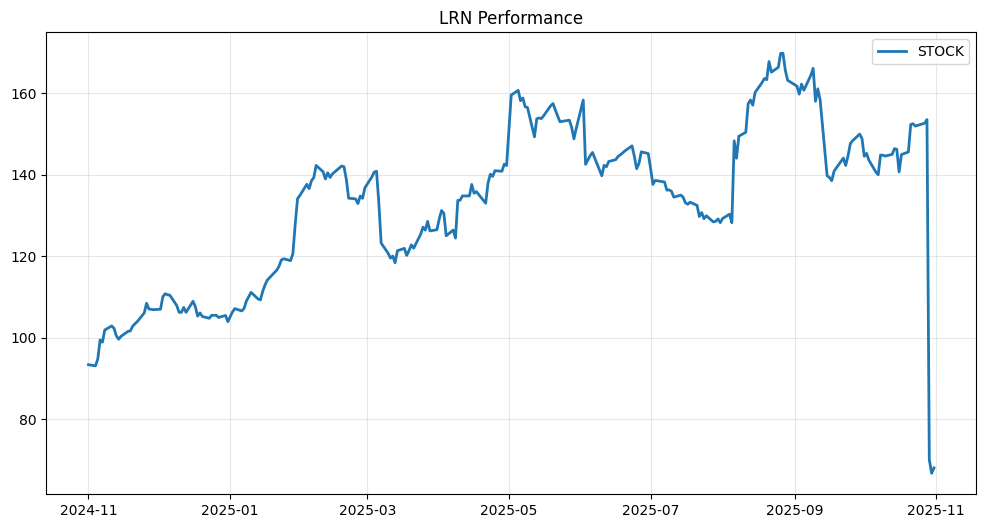

In [37]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def downloadstock(ticker, period='1y'):
  stock = yf.download(ticker, period=period)
  return stock

#timetocalc rsi
def rsicalc(data):
  stuff = data['Close']
  delta = data['Close'].diff()
  gain = delta.where(delta > 0, 0)
  loss = -delta.where(delta < 0, 0)

  avgplus = gain.ewm(span=14, adjust=False).mean()
  avgloss = loss.ewm(span=14, adjust=False).mean()

  rs = avgplus / avgloss
  rsi = 100 - (100 / (1+ rs))

  data['RSI'] = rsi
  return   stuff, rsi

choice = input('What stock you want bozo: ')
data = downloadstock(choice)
close_prices, rsi_values = rsicalc(data)


#now we gon buy or sell shi

cash = 10000
initial = cash
portfolio = []
trades = []
shares = 0
position = 0 #0 is out 1 is in

close_array = data['Close'].values
rsi_array = data['RSI'].values


for i in range(len(data)):
  currentrsi = rsi_array[i]
  currentclose = close_array[i]
  if pd.notna(currentrsi) and (currentrsi) < 30 and cash > 0 and position == 0:
    sharestobuy = cash / currentclose
    cash = 0
    shares += sharestobuy
    position = 1
    trades.append(f'Bought on day{i}')
  elif pd.notna(currentrsi) and (currentrsi) > 70 and position == 1:
    cash += shares*currentclose
    shares = 0
    position = 0
    trades.append(f'Sold on day{i}')
  if position == 1:
    currentport = shares*currentclose
  else:
    currentport = cash
  portfolio.append(currentport)

casb = 10000
sharesb = 0
portfoliob = []

for i in range(len(data)):
  currentclose = close_array[i]
  if casb > 0:
    sharestobuyb = casb / currentclose
    sharesb += sharestobuyb
    casb = 0
  newshi = sharesb*currentclose
  portfoliob.append(newshi)


print('RESULTS')
print(f'Initial Value: {initial}')
print(f'Final Value: {portfolio[-1]}')
print(f'Total Return: {((portfolio[-1] - initial) / initial * 100)}%')

buyholdy = (close_array[-1] - close_array[0]) / close_array[0] * 10000 + 10000

print(f'Buy and Hold RESULT:  ${buyholdy}')

df = pd.DataFrame({
    'PortfolioVal': portfolio,
    'BuyHold': portfoliob
}, index=data.index)



plt.figure(figsize=(12, 6))
plt.plot(data.index, df['PortfolioVal'], label='RSI STRAT', linewidth=2)
plt.plot(data.index, df['BuyHold'], label='Buy & Hold STRAT', linewidth=2)
plt.title('RSI VS BUY AND HOLD')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='STOCK', linewidth=2)
plt.title(f'{choice} Performance')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

